In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

1. Modify the dataset to pass into any type of machine learning models.


In [39]:
datasetTrain = "../data/FinalNew.csv"
df = pd.read_csv(datasetTrain)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43012,SR02,756141537,954.61,1970-01-01 00:00:00.020220113,EUR,NaN,12311807,1030.9788,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43114,NR03,798847812,787.36,1970-01-01 00:00:00.020220111,EUR,NaN,12311807,850.3488,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,1970-01-01 00:00:00.020220101,110019,NR01,960984659,67493.46,1970-01-01 00:00:00.020220112,EUR,93.0,12118758,72892.9368,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,1970-01-01 00:00:00.020220101,153013,SR02,925857642,1405.54,1970-01-01 00:00:00.020220106,EUR,93.0,1210499770,1517.9832,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,1970-01-01 00:00:00.020220101,160020,SR01,947942786,0.00,1970-01-01 00:00:00.020220106,EUR,64.0,1210351400,0.0000,1210354690


In [40]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [41]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
for col in num_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [42]:
df.rename(columns = {'amount_in_usd': 'target'}, inplace = True)

In [43]:
df.dropna(inplace = True)

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

2. Try different machine learning models like -
    - Linear Regression
    - Support Vector Machine
    - Decision Tree
    - Random Forest
    - AdaBoost
    - Xgboost etc.


In [44]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models.pop(33)
regressor_models.pop(46)

('SVR', SVR())

3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.


In [45]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__} \nTest R2: {r2} \n============================================')
    return model.__class__.__name__, model, mse, rmse, r2

In [46]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [47]:
regressor_models[47:]

[('TransformedTargetRegressor', TransformedTargetRegressor()),
 ('TweedieRegressor', TweedieRegressor())]

In [48]:
for model in regressor_models[:30]:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

ARDRegression 
Test R2: 0.0314297356425014 
AdaBoostRegressor 
Test R2: 0.6531916890290542 
BaggingRegressor 
Test R2: 0.9602040000559655 
BayesianRidge 
Test R2: 0.03625163733667447 
DecisionTreeRegressor 
Test R2: 0.9629590201409919 
DummyRegressor 
Test R2: -1.2786705793743636e-05 
ElasticNet 
Test R2: 0.014361044414236246 
ElasticNetCV 
Test R2: 0.01242633849433361 
ExtraTreeRegressor 
Test R2: 0.9043263869766089 
ExtraTreesRegressor 
Test R2: 0.9776295649124946 
GradientBoostingRegressor 
Test R2: 0.9570326970573474 
HistGradientBoostingRegressor 
Test R2: 0.8856411392916881 


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor 
Test R2: -0.011366684849554387 
KNeighborsRegressor 
Test R2: -0.05860279567811477 
Lars 
Test R2: 0.036285639638585776 
LarsCV 
Test R2: 0.03605954185461069 
Lasso 
Test R2: 0.012689107626622675 
LassoCV 
Test R2: 0.012426869681463337 
LassoLars 
Test R2: 0.012689117008392481 
LassoLarsCV 
Test R2: 0.03605954185461069 
LassoLarsIC 
Test R2: 0.03616446831133435 
LinearRegression 
Test R2: 0.036285639638837575 


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR 
Test R2: -0.0021931486708246517 
MLPRegressor 
Test R2: -0.12583389801405143 


4. Compare the accuracies of all the models


In [49]:
df_compare

,Regressor,Model,MSE,RMSE,R2
0,ARDRegression(),ARDRegression,3.715885,1.927663,0.031430
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,1.330518,1.153481,0.653192
0,(DecisionTreeRegressor(random_state=1610461715...,BaggingRegressor,0.152676,0.390738,0.960204
0,BayesianRidge(),BayesianRidge,3.697386,1.922859,0.036252
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.142106,0.376970,0.962959
0,DummyRegressor(),DummyRegressor,3.836513,1.958702,-0.000013
0,ElasticNet(),ElasticNet,3.781368,1.944574,0.014361
0,ElasticNetCV(),ElasticNetCV,3.788791,1.946482,0.012426
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.367048,0.605845,0.904326
0,"(ExtraTreeRegressor(random_state=241278024), E...",ExtraTreesRegressor,0.085823,0.292956,0.977630


In [50]:
df_compare = df_compare.sort_values(by = ['MSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=241278024), E...",ExtraTreesRegressor,0.085823,0.292956,0.977630
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.142106,0.376970,0.962959
0,(DecisionTreeRegressor(random_state=1610461715...,BaggingRegressor,0.152676,0.390738,0.960204
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.164843,0.406008,0.957033
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.367048,0.605845,0.904326


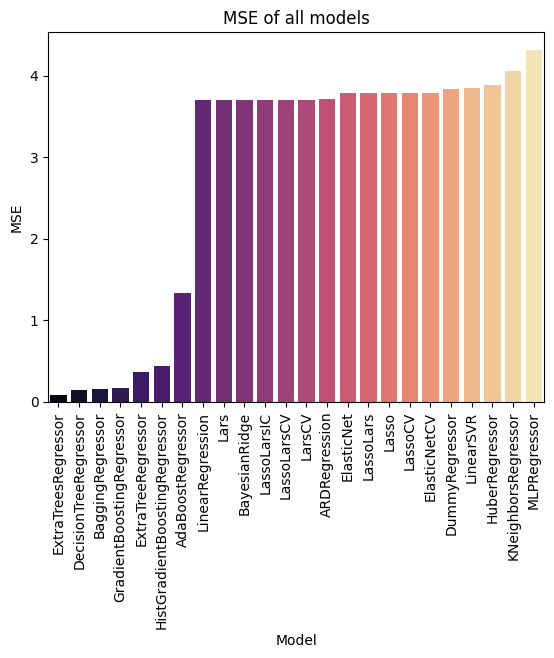

In [51]:
import seaborn as sns
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [52]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=241278024), E...",ExtraTreesRegressor,0.085823,0.292956,0.977630
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.142106,0.376970,0.962959
0,(DecisionTreeRegressor(random_state=1610461715...,BaggingRegressor,0.152676,0.390738,0.960204
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.164843,0.406008,0.957033
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.367048,0.605845,0.904326


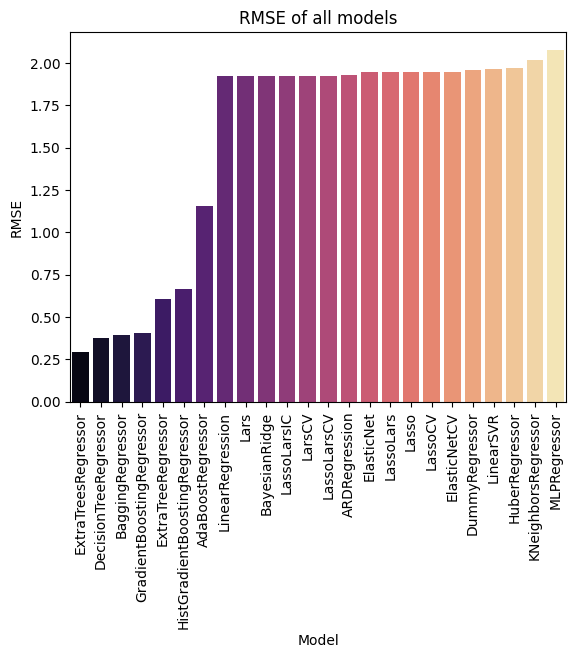

In [53]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [54]:
df_compare = df_compare[df_compare['R2'] > 0]
df_compare = df_compare.sort_values(by = ['R2'], ascending = False)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=241278024), E...",ExtraTreesRegressor,0.085823,0.292956,0.977630
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.142106,0.376970,0.962959
0,(DecisionTreeRegressor(random_state=1610461715...,BaggingRegressor,0.152676,0.390738,0.960204
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.164843,0.406008,0.957033
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.367048,0.605845,0.904326


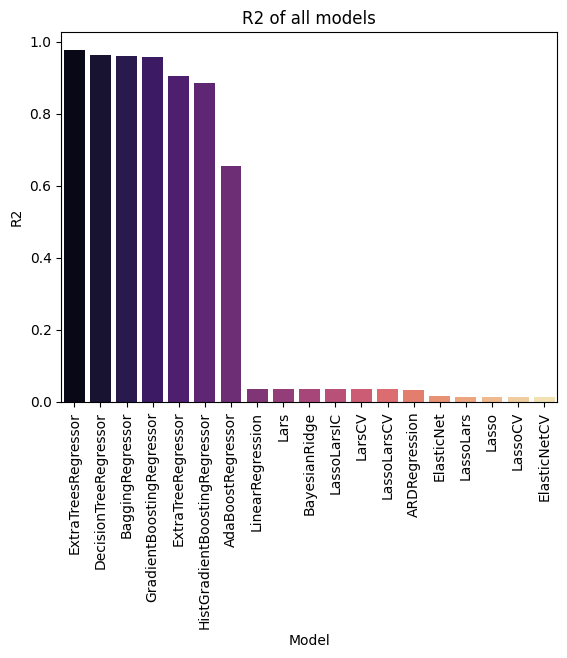

In [55]:
sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

5. Select the best possible model

In [56]:
best_model = best_model.drop_duplicates()
best_model

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=241278024), E...",ExtraTreesRegressor,0.085823,0.292956,0.977630
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.142106,0.376970,0.962959
0,(DecisionTreeRegressor(random_state=1610461715...,BaggingRegressor,0.152676,0.390738,0.960204
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.164843,0.406008,0.957033
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.367048,0.605845,0.904326


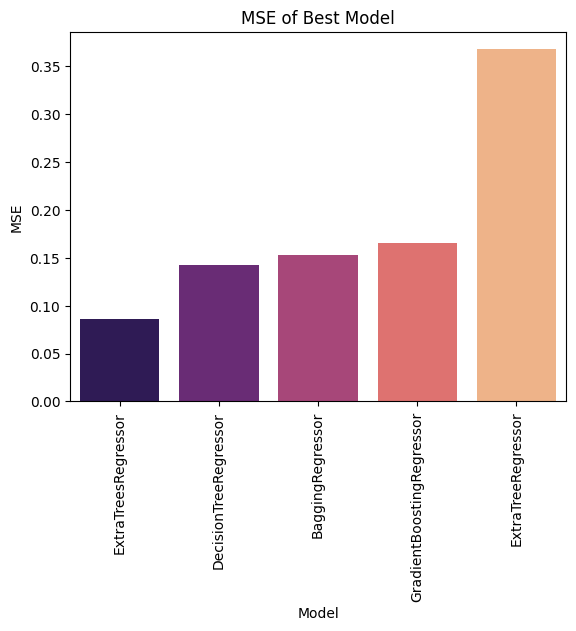

In [57]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

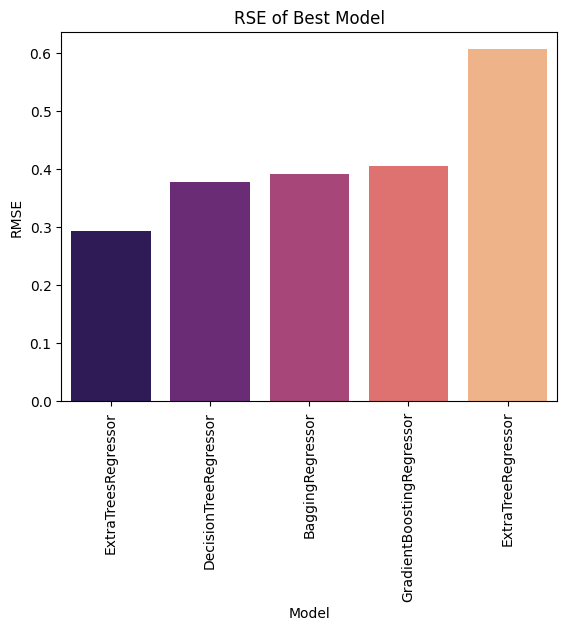

In [58]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

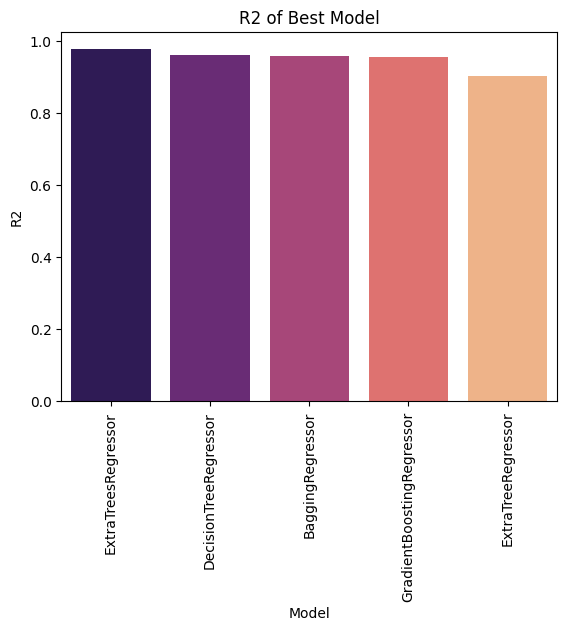

In [59]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [60]:
bestModel = set()

best_model = best_model.sort_values(by = ['MSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['RMSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['R2'], ascending = False)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])


6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms Come up with the best possible model accuracy.

In [61]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2



In [62]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

DecisionTreeRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Error
BaggingRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END ...................n_estimators=10;, score=0.988 total time=  41.0s
[CV 1/5] END ...................n_estimators=10;, score=0.934 total time=  42.9s
[CV 3/5] END ...................n_estimators=10;, score=0.961 total time=  47.4s
[CV 2/5] END ...................n_estimators=10;, score=0.985 total time=  47.9s
[CV 5/5] END ...................n_estimators=10;, score=0.916 total time=  49.2s
[CV 1/5] END ...................n_estimators=20;, score=0.947 total time= 1.5min
[CV 3/5] END ...................n_estimators=20;, score=0.956 total time= 1.5min
[CV 2/5] END ...................n_estimators=20;, score=0.986 total time= 1.5min
[CV 4/5] END ...................n_estimators=20;, score=0.988 total time= 1.5min
[CV 5/5] END ...................n_estimators=20;, score=0.910 total time= 1.5min
[CV 3/5] END ......

7. Deep Learning Model for Regression

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Reshape

In [125]:
import tensorflow.keras.backend as K

def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [113]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 17))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', r2])

model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)


Epoch 1/10
4227/4227 [==============================] - 13s 3ms/step - loss: 177.3402 - mse: 177.3402 - r2: -12381.1953 - val_loss: 3.5432 - val_mse: 3.5432 - val_r2: -2.6527
Epoch 2/10
4227/4227 [==============================] - 19s 4ms/step - loss: 3.2737 - mse: 3.2737 - r2: -21.1239 - val_loss: 3.5419 - val_mse: 3.5419 - val_r2: -2.6188
Epoch 3/10
4227/4227 [==============================] - 17s 4ms/step - loss: 3.6093 - mse: 3.6093 - r2: -50.6597 - val_loss: 3.5369 - val_mse: 3.5369 - val_r2: -2.2819
Epoch 4/10
4227/4227 [==============================] - 14s 3ms/step - loss: 3.0641 - mse: 3.0641 - r2: -5.0427 - val_loss: 3.5313 - val_mse: 3.5313 - val_r2: -3.1050
Epoch 5/10
4227/4227 [==============================] - 12s 3ms/step - loss: 3.0595 - mse: 3.0595 - r2: -4.7868 - val_loss: 3.5435 - val_mse: 3.5435 - val_r2: -3.4924
Epoch 6/10
4227/4227 [==============================] - 12s 3ms/step - loss: 3.0493 - mse: 3.0493 - r2: -3.7010 - val_loss: 3.5436 - val_mse: 3.5436 - val_

In [126]:
lstm = Sequential()
lstm.add(Reshape((1, 17), input_shape = (17,)))
lstm.add(LSTM(128, activation = 'relu', return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(128, activation = 'relu', return_sequences = True))
lstm.add(Dropout(0.2))
lstm.add(Dense(64, activation = 'relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(32, activation = 'relu'))

lstm.add(Dense(1, activation = 'linear'))

lstm.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', r2])

lstm.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])


y_pred = lstm.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0], y_pred.shape[1])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

Epoch 1/10
4227/4227 [==============================] - 23s 5ms/step - loss: 15.1745 - mse: 15.1745 - r2: -1475.3152 - val_loss: 3.5182 - val_mse: 3.5182 - val_r2: -5.4663
Epoch 2/10
4227/4227 [==============================] - 23s 5ms/step - loss: 20.9561 - mse: 20.9561 - r2: -459.5249 - val_loss: 3.5507 - val_mse: 3.5507 - val_r2: -1.6233
Epoch 3/10
4227/4227 [==============================] - 24s 6ms/step - loss: 4.0659 - mse: 4.0659 - r2: -62.7964 - val_loss: 3.5197 - val_mse: 3.5197 - val_r2: -3.1879
Epoch 4/10
4227/4227 [==============================] - 23s 5ms/step - loss: 3.1162 - mse: 3.1162 - r2: -13.0658 - val_loss: 3.5219 - val_mse: 3.5219 - val_r2: -5.8843
Epoch 5/10
4227/4227 [==============================] - 23s 5ms/step - loss: 3.4476 - mse: 3.4476 - r2: -11.1399 - val_loss: 3.5247 - val_mse: 3.5247 - val_r2: -3.3012
Epoch 6/10
4227/4227 [==============================] - 22s 5ms/step - loss: 3.0842 - mse: 3.0842 - r2: -7.6446 - val_loss: 3.5017 - val_mse: 3.5017 - va